In [1]:
import pandas 
import seaborn 
import matplotlib.pyplot as plt

mental_health = pandas.read_csv('Mental health Depression disorder Data.csv')

mental_health.head()

/var/folders/wy/_hw3zhvx363c_ckbd5r10m0c0000gn/T/ipykernel_56496/914791033.py:5: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mental_health = pandas.read_csv('Mental health Depression disorder Data.csv')


,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [11]:
mental_health.describe()

,index,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,108553.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,54276.000000,3.989921,0.862278,3.497654,1.585821
std,31336.696223,1.167526,0.460679,0.655859,0.860283
min,0.000000,2.023393,0.383650,2.139903,0.446940
25%,27138.000000,3.188824,0.535064,3.005529,0.993685
50%,54276.000000,3.554373,0.726430,3.499606,1.479936
75%,81414.000000,4.682163,0.940157,3.912381,1.867834
max,108552.000000,8.967330,3.452476,6.602754,5.474668


In [4]:
mental_health.columns

Index(['index', 'Entity', 'Code', 'Year', 'Schizophrenia (%)',
       'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)'],
      dtype='object')

In [7]:
percentage_columns = ['Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']
mean_prevalence = mental_health[percentage_columns].mean()
highest_disorder = mean_prevalence.idxmax()
highest_prevalence = mean_prevalence.max()
print(f"The mental health disorder with the highest mean prevalence is '{highest_disorder}' with a mean prevalence of {highest_prevalence:.2f}.")




The mental health disorder with the highest mean prevalence is 'Anxiety disorders (%)' with a mean prevalence of 3.99.


In [3]:


percentage_columns = mental_health[['Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']]

top_3_disorders = percentage_columns.max().sort_values(ascending=False).head(3).index

top_3_percentages = percentage_columns.max().sort_values(ascending=False).head(3).values

result_df = pandas.DataFrame({'Disorder': top_3_disorders, 'Percentage': top_3_percentages})

print(result_df)



                    Disorder  Percentage
0      Anxiety disorders (%)    8.967330
1             Depression (%)    6.602754
2  Alcohol use disorders (%)    5.474668


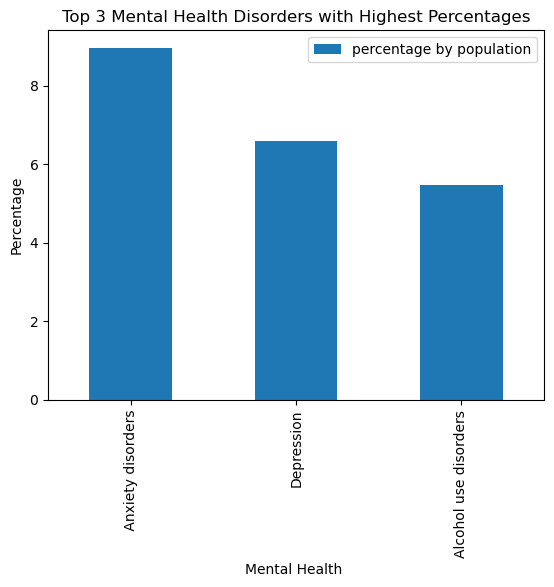

In [23]:
Highest_percentage_population = pandas.DataFrame({"Top Three": [" Anxiety disorders", "Depression", "Alcohol use disorders"], 'percentage by population': [ 8.967330, 6.602754, 5.474668 ]})
Highest_percentage_population.plot.bar(x = "Top Three", y = "percentage by population")
plt.title('Top 3 Mental Health Disorders with Highest Percentages')
plt.xlabel('Mental Health ')
plt.ylabel('Percentage')
plt.show()



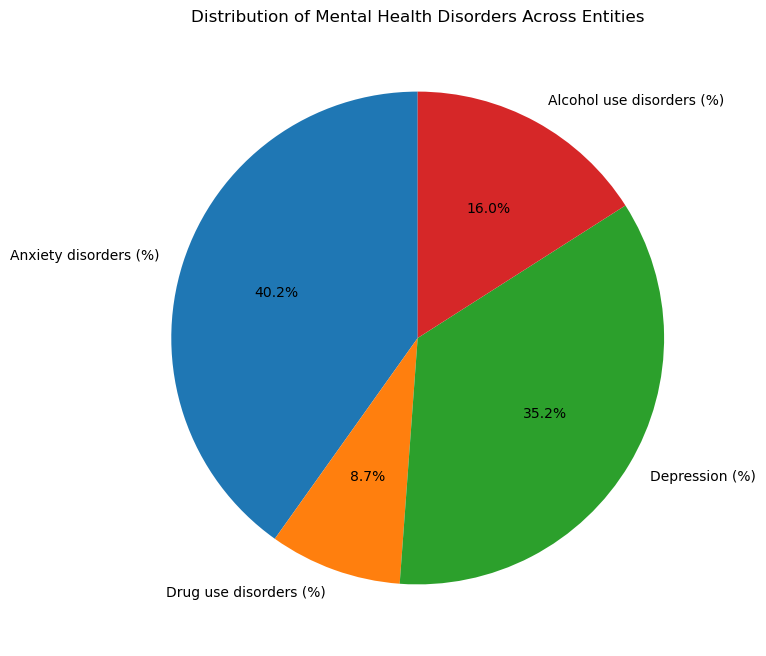

In [49]:
percentage_columns = ['Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']


percentage_df = mental_health[percentage_columns]

total_percentages = percentage_df.sum()

total_percentages.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Distribution of Mental Health Disorders Across Entities')
plt.ylabel('')
plt.show()

In [7]:
column_of_interest = 'Anxiety disorders (%)'


sorted_mental_health = mental_health.sort_values(by=column_of_interest, ascending=False)


row_with_highest_mental_health = sorted_mental_health.iloc[0]

print("Country or State with the highest mental health:")
print(row_with_highest_mental_health)

Country or State with the highest mental health:
index                               4016
Entity                       New Zealand
Code                                 NZL
Year                                2002
Schizophrenia (%)               0.339223
Bipolar disorder (%)            1.195859
Eating disorders (%)            0.635264
Anxiety disorders (%)            8.96733
Drug use disorders (%)          2.141658
Depression (%)                  4.125419
Alcohol use disorders (%)       1.447662
Name: 4016, dtype: object


In [3]:
mental_health.groupby('Entity')['Anxiety disorders (%)'].max().sort_values(ascending=False).head(10)



Entity
New Zealand         8.967330
Northern Ireland    8.124301
Norway              7.680800
Netherlands         7.271261
Iran                7.174615
Australasia         7.064532
United States       6.971995
Germany             6.784381
France              6.782676
North America       6.775812
Name: Anxiety disorders (%), dtype: float64

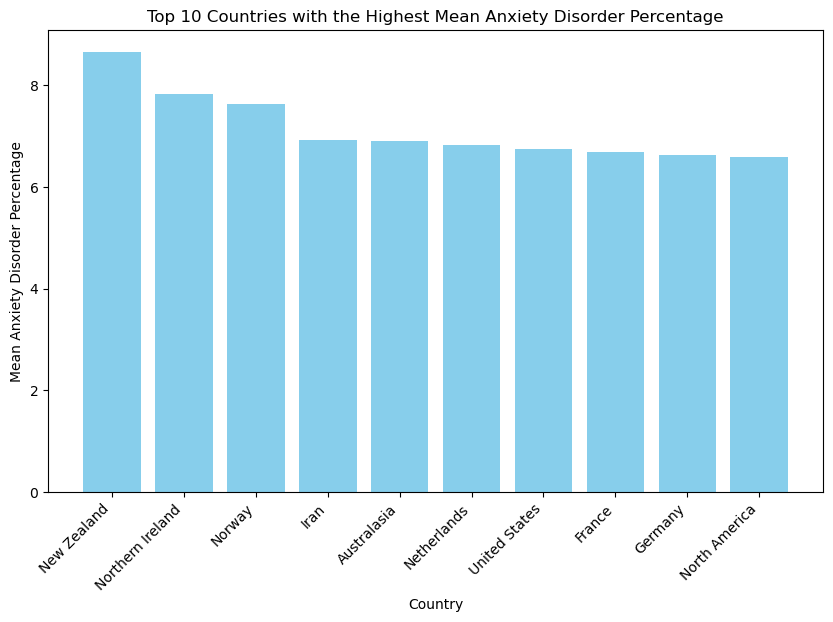

In [51]:
top_countries_data = {
    'New Zealand': 8.967330,
    'Northern Ireland': 8.124301,
    'Norway': 7.637363,
    'Iran': 6.932546,
    'Australasia': 6.895850,
    'Netherlands': 6.816901,
    'United States': 6.741584,
    'France': 6.686942,
    'Germany': 6.633030,
    'North America': 6.590146
}


plt.figure(figsize=(10, 6))
plt.bar(top_countries_data.keys(), top_countries_data.values(), color='skyblue')
plt.xlabel('Country')
plt.ylabel('Mean Anxiety Disorder Percentage')
plt.title('Top 10 Countries with the Highest Mean Anxiety Disorder Percentage')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [56]:
selected_row = mental_health.loc[4016, ["Year", "Entity", "Anxiety disorders (%)" , "index"]]

print("Values in the 20th row for specified columns:")
print(selected_row)

Values in the 20th row for specified columns:
Year                            2002
Entity                   New Zealand
Anxiety disorders (%)        8.96733
index                           4016
Name: 4016, dtype: object


In [77]:
mental_health["Entity"].iloc[6077:6100]


6077    United States
6078    United States
6079    United States
6080    United States
6081    United States
6082    United States
6083    United States
6084    United States
6085    United States
6086    United States
6087    United States
6088    United States
6089    United States
6090    United States
6091    United States
6092    United States
6093    United States
6094    United States
6095    United States
6096    United States
6097    United States
6098    United States
6099    United States
Name: Entity, dtype: object

In [12]:
subset_df = mental_health.loc[6076:6103, ["Entity", "Year", "Anxiety disorders (%)"]]
print(subset_df)




             Entity  Year  Anxiety disorders (%)
6076  United States  1990               6.576884
6077  United States  1991               6.553351
6078  United States  1992               6.536143
6079  United States  1993               6.525536
6080  United States  1994               6.522278
6081  United States  1995               6.526489
6082  United States  1996               6.578023
6083  United States  1997               6.688847
6084  United States  1998               6.818473
6085  United States  1999               6.926351
6086  United States  2000               6.971563
6087  United States  2001               6.971995
6088  United States  2002               6.971891
6089  United States  2003               6.970935
6090  United States  2004               6.968875
6091  United States  2005               6.965249
6092  United States  2006               6.937038
6093  United States  2007               6.875454
6094  United States  2008               6.801899
6095  United States 

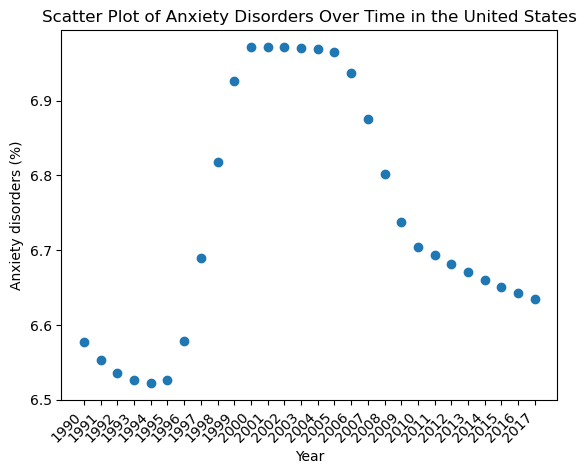

In [24]:
anxiety_disorder_coloum = mental_health.loc[6076:6103, ["Entity", "Year", "Anxiety disorders (%)"]]



plt.scatter(anxiety_disorder_coloum['Year'], anxiety_disorder_coloum['Anxiety disorders (%)'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Anxiety disorders (%)')
plt.title('Scatter Plot of Anxiety Disorders Over Time in the United States')
plt.xticks(rotation=45, ha='right') 
# Show the plot
plt.show()
